<a href="https://colab.research.google.com/github/abhinavmishragsv-analytics/Job-Market-Analysis-Using-EDA-Machine-Learning/blob/main/Job_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (250, 10)


,job_title,company,location,job_type,category,salary_min,salary_max,experience_required,publication_date,skills
0,Engineering Manager,DataInc,"San Francisco, CA",Remote,Technology,151082,291345,4.0,2025-11-27,"AWS, Agile, Machine Learning, Kubernetes, Mong..."
1,Engineering Manager,EnterpriseHub,"New York, NY",Remote,Technology,156891,280075,3.0,2025-11-27,"Java, Agile, Git, SQL, Ruby, Go"
2,Engineering Manager,StartupXYZ,"Seattle, WA",Part-time,Technology,152134,280310,4.0,2025-11-27,"AWS, Python, Kubernetes, Git"
3,Lead Engineer,WebDynamics,"Seattle, WA",Full-time,Technology,151918,253988,7.0,2025-11-27,"Agile, Git, Docker, REST APIs, TypeScript"
4,Senior Software Engineer,DigitalWorks,"San Francisco, CA",Full-time,Technology,148141,252584,9.0,2025-11-27,"Agile, Ruby, Docker, Git, JavaScript"


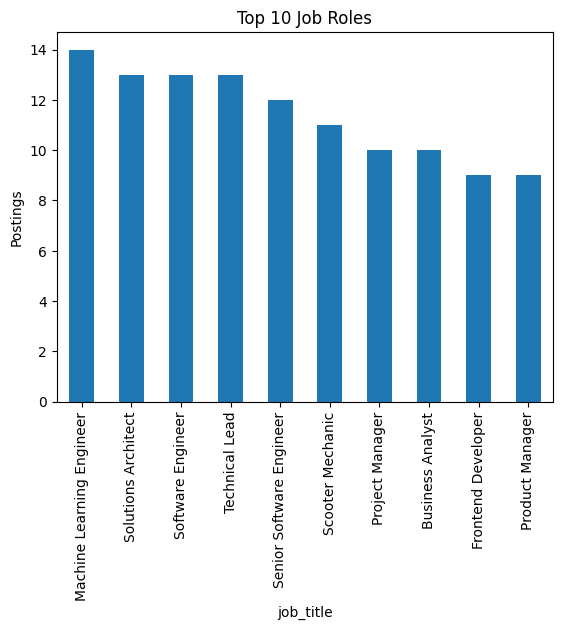

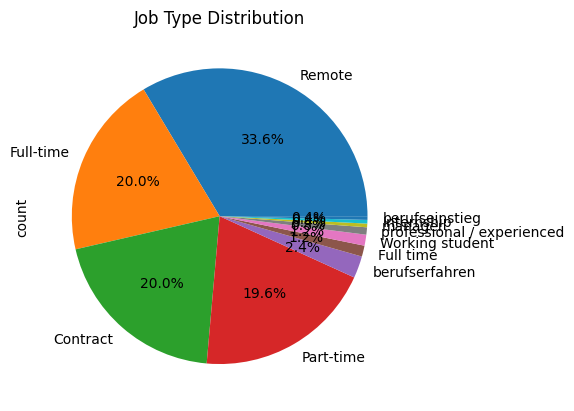

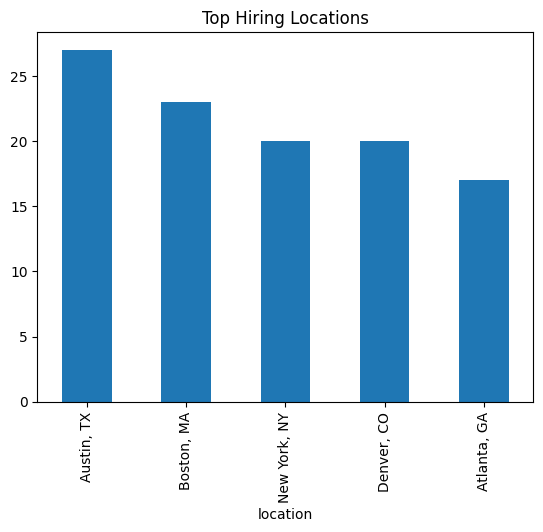

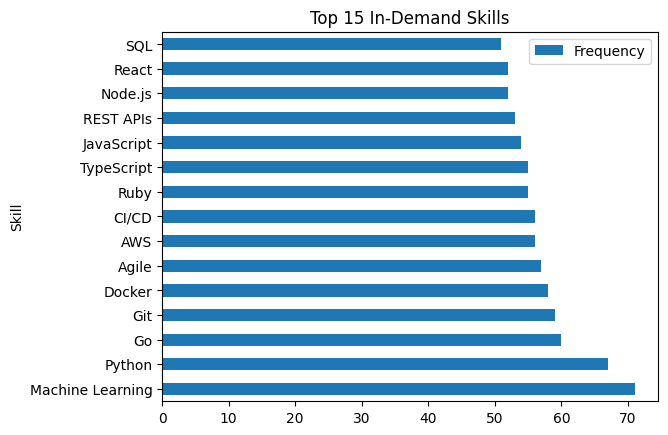

Correlation: 0.347349803973752


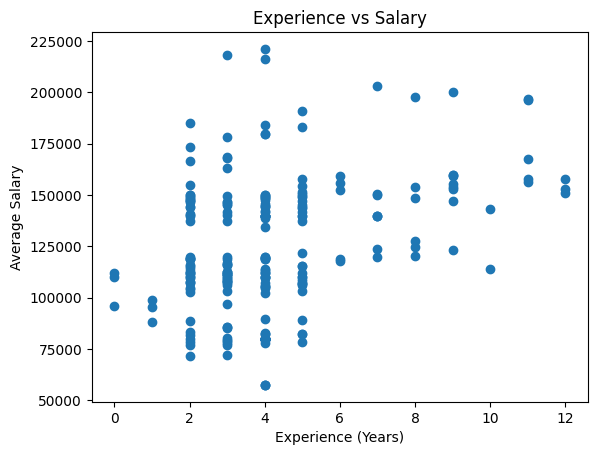


NaN check before training:
experience_required    0
skill_count            0
job_title_enc          0
job_type_enc           0
dtype: int64
R2 Score: 0.2301968669834623
MAE: 24316.335584982415


,Feature,Impact
0,experience_required,5672.725998
1,skill_count,4289.793653
3,job_type_enc,1390.580436
2,job_title_enc,-163.591313


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv("job_market.csv")

print("Dataset Shape:", df.shape)
display(df.head())

df['skills'] = df['skills'].fillna("")

df['experience_required'] = df['experience_required'].fillna(
    df['experience_required'].median()
)

df['job_type'] = df['job_type'].fillna(df['job_type'].mode()[0])
df['job_title'] = df['job_title'].fillna(df['job_title'].mode()[0])

df['avg_salary'] = (df['salary_min'] + df['salary_max']) / 2

df['skill_count'] = df['skills'].apply(
    lambda x: len(x.split(', ')) if x != "" else 0
)

df['job_title'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Job Roles")
plt.ylabel("Postings")
plt.show()

df['job_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Job Type Distribution")
plt.show()

df['location'].value_counts().head(5).plot(kind='bar')
plt.title("Top Hiring Locations")
plt.show()

skills_series = df['skills'].str.split(', ')
all_skills = [s for row in skills_series for s in row if s != ""]

skill_freq = pd.DataFrame(
    Counter(all_skills).most_common(15),
    columns=['Skill', 'Frequency']
)

skill_freq.plot(kind='barh', x='Skill', y='Frequency')
plt.title("Top 15 In-Demand Skills")
plt.show()

print("Correlation:", df['experience_required'].corr(df['avg_salary']))

plt.scatter(df['experience_required'], df['avg_salary'])
plt.xlabel("Experience (Years)")
plt.ylabel("Average Salary")
plt.title("Experience vs Salary")
plt.show()

le_role = LabelEncoder()
le_type = LabelEncoder()

df['job_title_enc'] = le_role.fit_transform(df['job_title'])
df['job_type_enc'] = le_type.fit_transform(df['job_type'])

print("\nNaN check before training:")
print(df[['experience_required','skill_count','job_title_enc','job_type_enc']].isnull().sum())

X = df[['experience_required', 'skill_count', 'job_title_enc', 'job_type_enc']]
y = df['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("R2 Score:", r2_score(y_test, preds))
print("MAE:", mean_absolute_error(y_test, preds))

importance = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_
}).sort_values(by='Impact', ascending=False)

display(importance)
